# Clase 6
Aplicaremos métodos de clustering para tratar de analizar un conjunto de respuestas a una encuesta política.

In [1]:
%pylab inline
import pandas as pd
import IPython
import sklearn as sk
from sklearn import cluster
from sklearn import decomposition
from sklearn import metrics
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Carga de datos
Los datos vienen en un archivo CSV. Ya incluimos la carga del archivo y otros datos de referencia.

In [2]:
# Importamos los datos utilizando pandas
datos=pd.read_csv("./data.csv")

# Creo la tabla de candidatos a mano
candidatos=pd.DataFrame(
    [
        [1,'Oscar Andrade', 'Frente Amplio'],
        [2,'Mario Bergara', 'Frente Amplio'],
        [3,'Carolina Cosse', 'Frente Amplio'],
        [4,'Daniel Martínez', 'Frente Amplio'],
        [5,'Verónica Alonso', 'Partido Nacional'],
        [6,'Enrique Antía', 'Partido Nacional'],
        [8,'Carlos Iafigliola', 'Partido Nacional'],
        [9,'Luis Lacalle Pou', 'Partido Nacional'],
        [10,'Jorge Larrañaga', 'Partido Nacional'],
        [11,'Juan Sartori', 'Partido Nacional'],
        [12,'José Amorín', 'Partido Colorado'],
        [13,'Pedro Etchegaray', 'Partido Colorado'],
        [14,'Edgardo Martínez', 'Partido Colorado'],
        [15,'Héctor Rovira', 'Partido Colorado'],
        [16,'Julio María Sanguinetti', 'Partido Colorado'],
        [17,'Ernesto Talvi', 'Partido Colorado'],
        [18,'Pablo Mieres', 'La Alternativa'],
        [19,'Gonzalo Abella', 'Unidad Popular'],        
        [20,'Edgardo Novick', 'Partido de la Gente'],
        [21,'César Vega', 'PERI'],
        [22,'Rafael Fernández', 'Partido de los Trabajadores'],
        [23,'Justin Graside', 'Partido Digital'],        
        [24,'Gustavo Salle', 'Partido Verde'],
        [25,'Carlos Techera', 'Partido de Todos']
    ],
    columns=['candidatoId','name','party'],
)

datos=datos.merge(candidatos,on=['candidatoId'])

# Sólo por si necesita, cargamos un diccionario con el texto de cada pregunta
preguntas={
    '1': 'Controlar la inflación es más importante que controlar el desempleo. ',
    '2': 'Hay que reducir la cantidad de funcionarios públicos',
    '3': 'Deberia aumentar la carga de impuestos para los ricos.',
    '4': 'El gobierno no debe proteger la industria nacional, si las fábricas no son competitivas esta bien que desaparezcan.',
    '5': 'La ley de inclusión financiera es positiva para la sociedad. ',
    '6': 'Algunos sindicatos tienen demasiado poder. ',
    '7': 'Cuanto más libre es el mercado, más libre es la gente. ',
    '8': 'El campo es y debe ser el motor productivo de Uruguay. ',
    '9': 'La inversión extranjera es vital para que Uruguay alcance el desarrollo. ',
    '10': 'Los supermercados abusan del pueblo con sus precios excesivos. ',
    '11': 'Con la vigilancia gubernamental (escuchas telefonicas, e-mails y camaras de seguridad) el que no tiene nada que esconder, no tiene de que preocuparse. ',
    '12': 'La pena de muerte debería ser una opción para los crímenes mas serios. ',
    '13': 'Uruguay debería aprobar más leyes anti corrupción y ser más duro con los culpables. ',
    '14': 'Las FF.AA. deberían tener un rol activo en la seguridad pública. ',
    '15': 'Las carceles deberían ser administradas por organizaciones privadas. ',
    '16': 'Hay que aumentar el salario de los policias significativamente. ',
    '17': 'Para los delitos más graves hay que bajar la edad de imputabilidad a 16 años. ',
    '18': 'Uruguay no necesita un ejército. ',
    '19': 'Uruguay es demasiado generoso con los inmigrantes. ',
    '20': 'La ley trans fue un error. ',
    '21': 'El feminismo moderno no busca la igualdad sino el poder. ',
    '22': 'Para la ley no deberia diferenciarse homicidio de femicidio. ',
    '23': 'La separación de estado y religión me parece importante. ',
    '24': 'La legalización de la marihuana fue un error. ',
    '25': 'La legalización del aborto fue un error. ',
    '26': 'El foco del próximo gobierno debe ser mejorar la educación pública. '
}

# Ordeno los datos por partido y luego por candidato

datos = datos.sort_values(by=['party','name'])


Cada fila es la respuesta de una persona, contiene un id único, el candidate que eligió, las repuestas a las 26 preguntas y la fecha. Además le agregamos el nombre del candidato y el partido al que pertenece.

Imprimimos algunos datos de prueba para asegurarnos de que quedaron bien cargados.

In [3]:
datos[:10]

,id,candidatoId,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,fecha,name,party
21387,38,3,4,4,3,4,5,5,3,2,...,1,1,1,5,1,1,5,2019-02-06T16:52:06.318997,Carolina Cosse,Frente Amplio
21388,39,3,3,4,5,2,4,4,2,2,...,1,1,2,5,1,1,3,2019-02-06T17:00:09.220160,Carolina Cosse,Frente Amplio
21389,41,3,2,3,4,2,4,4,2,2,...,1,2,2,5,1,1,4,2019-02-06T17:14:33.621159,Carolina Cosse,Frente Amplio
21390,42,3,4,4,3,4,4,4,3,3,...,3,3,2,5,2,2,4,2019-02-06T17:44:43.482259,Carolina Cosse,Frente Amplio
21391,44,3,4,5,3,3,4,5,5,4,...,2,4,4,5,2,1,5,2019-02-06T18:30:28.400279,Carolina Cosse,Frente Amplio
21392,47,3,2,5,5,1,4,5,1,1,...,1,1,1,5,1,1,5,2019-02-06T22:02:08.552799,Carolina Cosse,Frente Amplio
21393,48,3,3,5,5,1,2,5,4,4,...,2,4,5,5,1,1,5,2019-02-07T03:45:47.511548,Carolina Cosse,Frente Amplio
21394,57,3,2,2,5,2,3,2,1,4,...,1,1,1,5,1,1,4,2019-02-07T15:10:43.354845,Carolina Cosse,Frente Amplio
21395,60,3,3,2,5,3,4,3,2,3,...,1,2,5,5,1,1,5,2019-02-07T15:20:58.874500,Carolina Cosse,Frente Amplio
21396,87,3,3,4,5,2,4,4,1,2,...,1,1,1,5,1,1,5,2019-02-07T17:40:44.657643,Carolina Cosse,Frente Amplio


**IMPLEMENTAR:** Dibujar un gráfico de barras con la distribución de votos por partido.

<Container object of 11 artists>

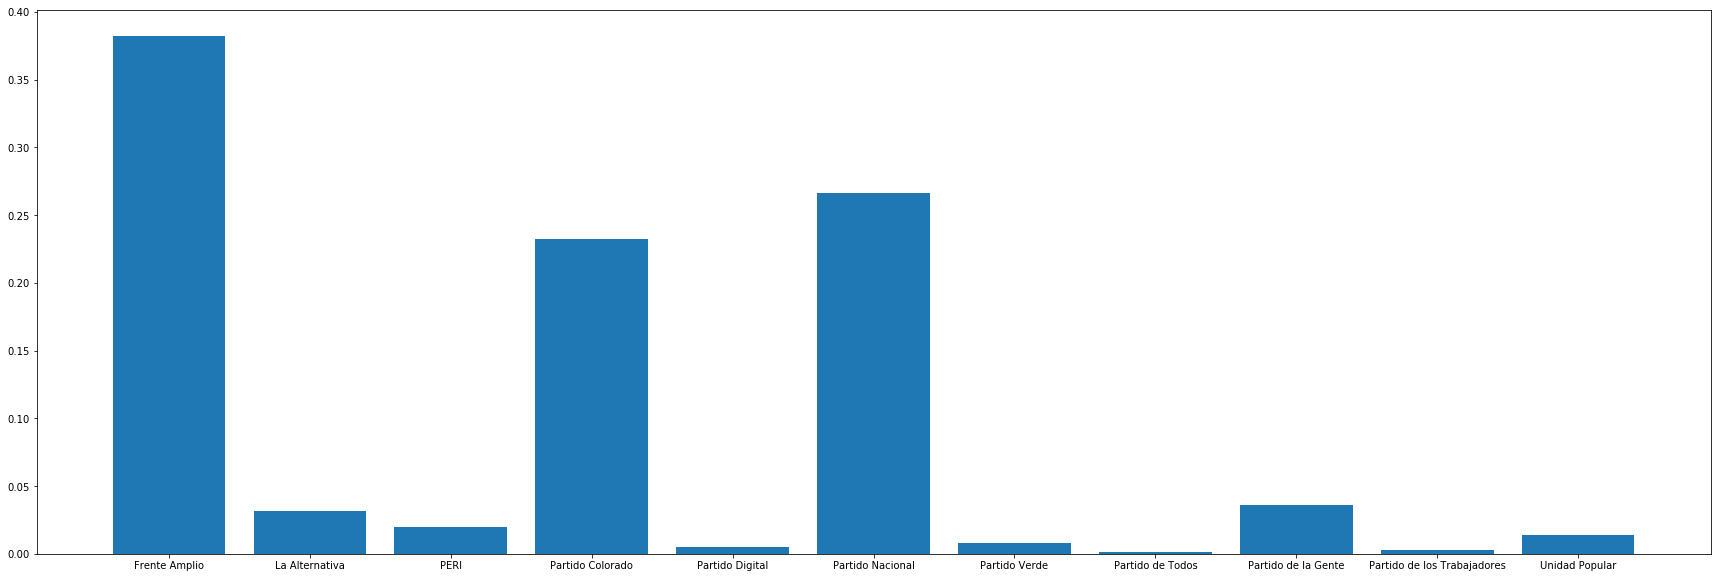

In [4]:
partidos,num_votos = datos['party'].unique(),datos.size

dist_votos = np.zeros_like(partidos)
for i,party in enumerate(partidos):
    dist_votos[i] = (datos[datos['party'] == party].size) / num_votos

plt.figure(figsize=(30,10))
plt.bar(range(0,partidos.size), dist_votos, tick_label=partidos)

**IMPLEMENTAR:** Obtener los siguientes conjuntos de datos:
- Un conjunto con todos los votos
- Un conjunto análogo al anterior, pero solo con los votos del Frente Amplio
- Un conjunto análogo al anterior, pero solo con los votos del Partido Nacional
- Un conjunto análogo al anterior, pero solo con los votos del Partido Colorado

In [5]:
votos = datos.iloc[:,2:28]
votos_fa = datos[datos['party'] == 'Frente Amplio'].iloc[:,2:28]
votos_pn = datos[datos['party'] == 'Partido Nacional'].iloc[:,2:28]
votos_pc = datos[datos['party'] == 'Partido Colorado'].iloc[:,2:28]

print('Votos totales: ',votos.shape)
print('Votos FA: ',votos_fa.shape)
print('Votos PN: ',votos_pn.shape)
print('Votos PC: ',votos_pc.shape)

Votos totales:  (34780, 26)
Votos FA:  (13288, 26)
Votos PN:  (9261, 26)
Votos PC:  (8082, 26)


# PCA
Utilizaremos la técnica de PCA para poder visualizar mejor los datos y luego los resultados del clustering.

El siguiente código creará una transformación a dos dimensiones de los datos y definirá el método plot_pca_data() para visualizar los votos en dos dimensiones. El método toma como entrada una lista de pares (datos,color), lo que permitirá visualizar diferentes resultados en el mismo gráfico.

Uso: _plot_pca_data([(conjunto1,color1), (conjunto2,color2), ...])_

Donde _color_ puede ser 'r', 'g', 'b', 'y', 'k', etc.

Opcionalmente, podemos indicar un conjunto de centroides a dibujar: _plot_pca_data([(conjunto1,color1), (conjunto2,color2), ...], centroides)_

In [6]:
pca = decomposition.PCA(n_components=2).fit(votos)

def plot_pca_data(data_list=[],centroids=None):
    plt.figure(figsize=(15,10))
    plt.clf()
    x_min,x_max,y_min,y_max = np.inf,-np.inf,np.inf,-np.inf

    for data,color in data_list:
        reduced = pca.transform(data)
        x_min = min(x_min,reduced[:, 0].min() - 1)
        x_max = max(x_max,reduced[:, 0].max() + 1)
        y_min = min(y_min,reduced[:, 1].min() - 1)
        y_max = max(y_max,reduced[:, 1].max() + 1)
        plt.plot(reduced[:, 0], reduced[:, 1], color + '.', markersize=1)

    if centroids is not None:
        r_centroids = pca.transform(centroids)
        plt.scatter(r_centroids[:,0], r_centroids[:,1], marker='.', s=169, linewidths=3, color='w', zorder=10)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

**IMPLEMENTAR:** Dibuje un gráfico de todos los votos.

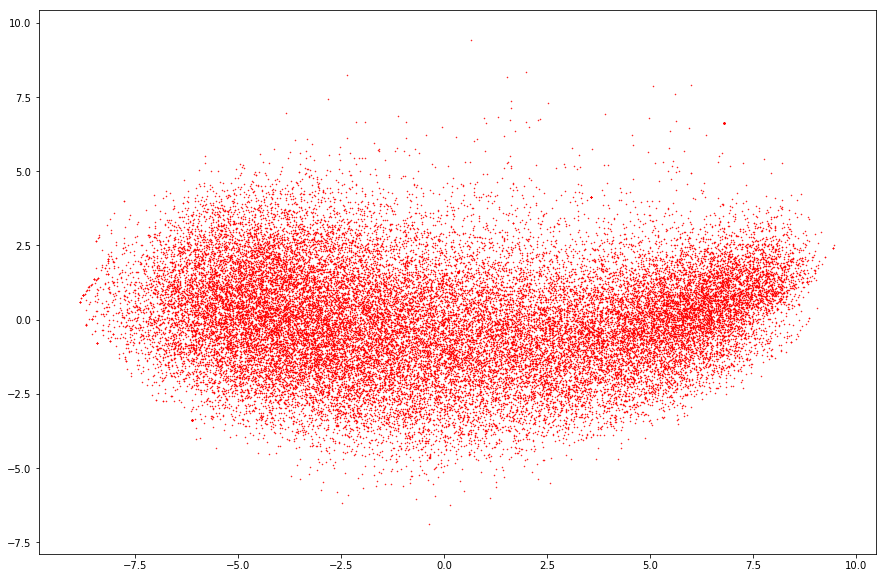

In [7]:
plot_pca_data([(votos,'r')])

**IMPLEMENTAR:** Dibuje un gráfico de los votos del Frente Amplio, Partido Nacional y Partido Colorado con diferentes colores para poder visualizarlos mejor.

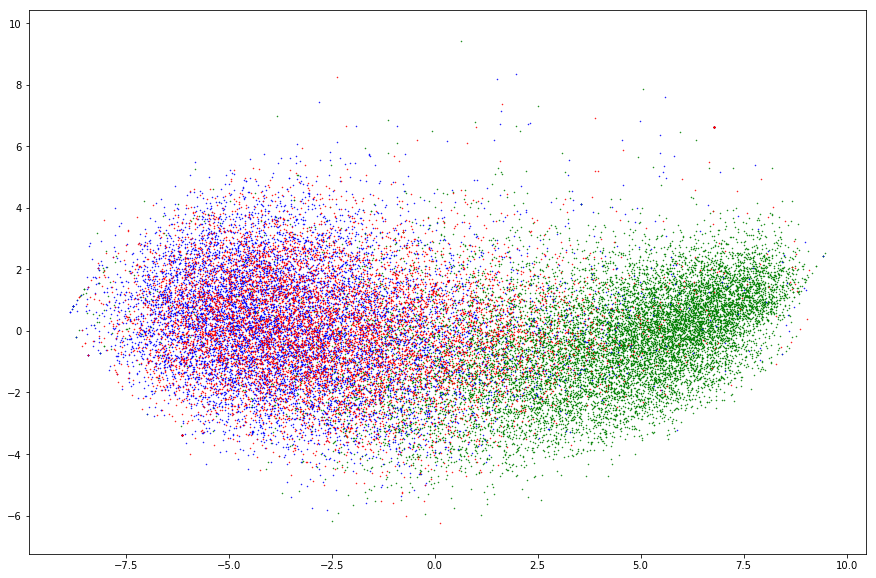

In [8]:
plot_pca_data([(votos_fa,'g'),(votos_pn,'b'),(votos_pc,'r')])

# Clustering

Aplicaremos el algoritmo de K-means para clusterizar estos datos. Primero intentaremos encontrar la mejor cantidad de clusters K para este conjunto.

**IMPLEMENTAR:** Realice el clustering de K-means para diferentes valores de K y grafique el costo de cada clustering (inertia).

<Container object of 8 artists>

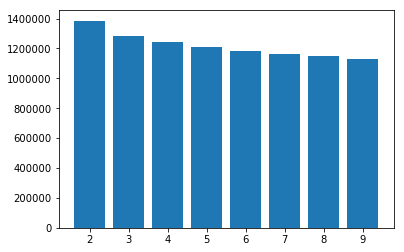

In [9]:
from sklearn.cluster import KMeans

ks = []
costs = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(votos)
    ks += [k]
    costs += [kmeans.inertia_]

plt.bar(ks,costs)

**IMPLEMENTAR:** Otra técnica que puede servir es medir el coeficiente de silueta. Realice el clustering de K-means para diferentes valores de K y grafique el coeficiente de silueta para cada uno.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

ks = []
silhouette_scores = []
for k in range(2,5):
    print(k)
    kmeans = KMeans(n_clusters=k).fit_predict(votos)
    ks += [k]
    silhouette_scores += [silhouette_score(votos, kmeans)]

plt.bar(ks,silhouette_scores)

2


**IMPLEMENTAR** Realice el clustering con K-means para K=2, imprima SSE y coeficiente de silueta y grafique los resultados en dos colores junto con sus centroides.

SSE:  1385923.55084


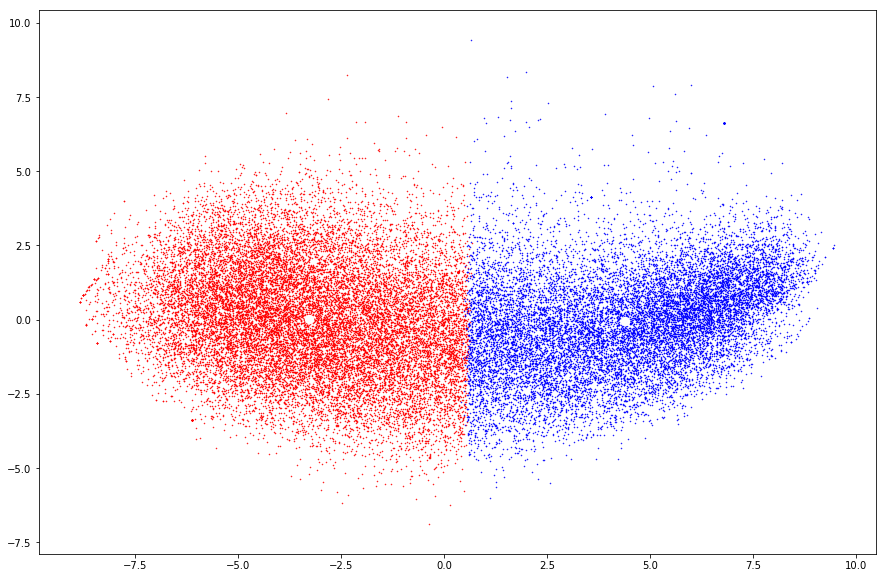

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score

kmeans = KMeans(n_clusters=2).fit(votos)
# labels = kmeans.predict(votos)

print('SSE: ', kmeans.inertia_)
# print('Silueta: ', silhouette_score(votos, kmeans.labels_))

plot_pca_data([(votos[kmeans.labels_==0],'r'),(votos[kmeans.labels_==1],'b')], kmeans.cluster_centers_)

**IMPLEMENTAR** Realice el clustering con K-means para K=3, imprima SSE y coeficiente de silueta y grafique los resultados en tres colores junto con sus centroides.

SSE:  1284848.76599


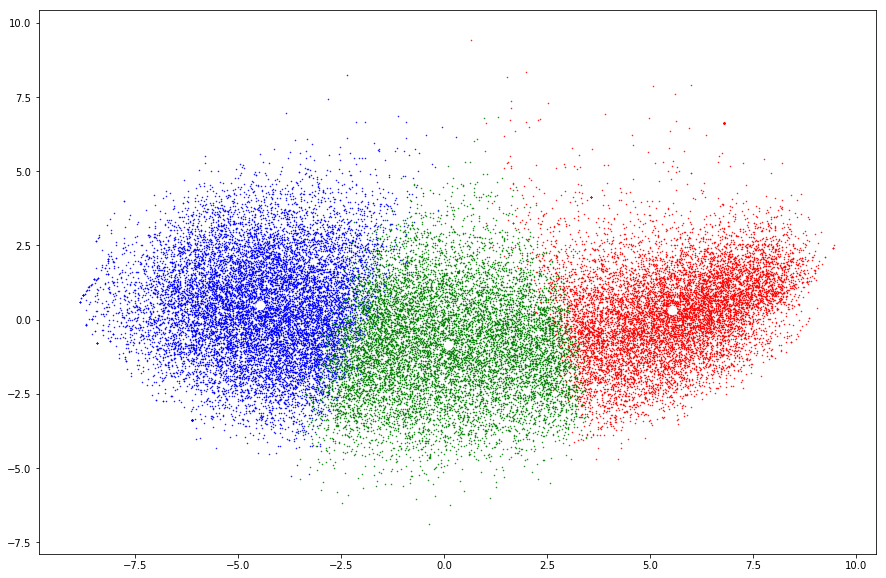

In [13]:
kmeans = KMeans(n_clusters=3).fit(votos)
labels = kmeans.predict(votos)

print('SSE: ', kmeans.inertia_)
# print('Silueta: ', silhouette_score(votos, labels))

plot_pca_data([(votos[labels==0],'r'),(votos[labels==1],'b'),(votos[labels==2],'g')], kmeans.cluster_centers_)

**IMPLEMENTAR:** Realice el clustering con AgglomerativeClustering para K=3, imprima coeficiente de silueta y grafique los resultados en tres colores.

**NOTA:** Este proceso puede ser lento y consumir recursos. Puede resultar útil reducir la cantidad de datos para aplicarlo.

<class 'pandas.core.frame.DataFrame'>


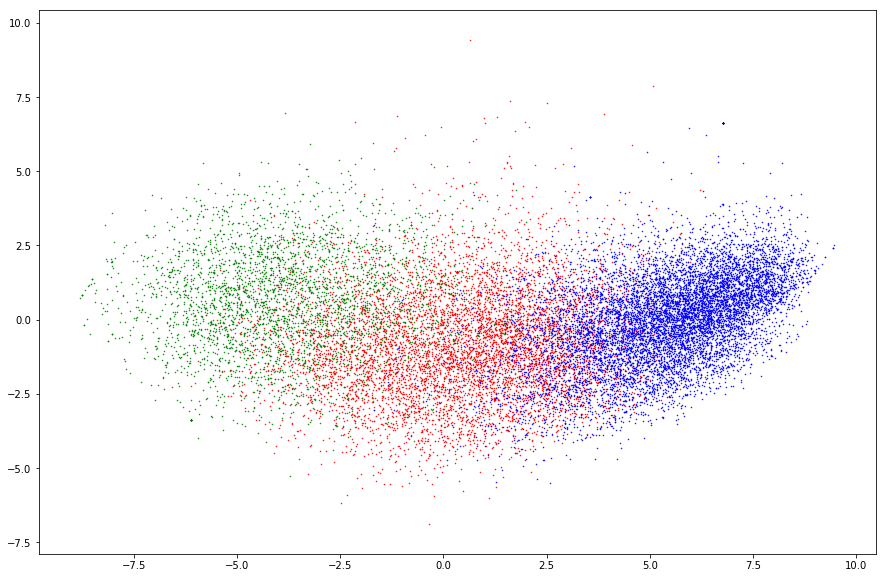

In [17]:
from sklearn.cluster import AgglomerativeClustering

votos = votos.iloc[:20000,:]
ac = AgglomerativeClustering(n_clusters=3).fit(votos)

# print('Silueta: ', silhouette_score(votos, ac.labels_))

plot_pca_data([(votos[ac.labels_==0],'r'),(votos[ac.labels_==1],'b'),(votos[ac.labels_==2],'g')])

**OPCIONAL:** Realice un dendograma del conjunto de datos. En este caso necesitará realizar un muestreo para reducir la cantidad de datos debido a que no podrá visualizarse el árbol completo.

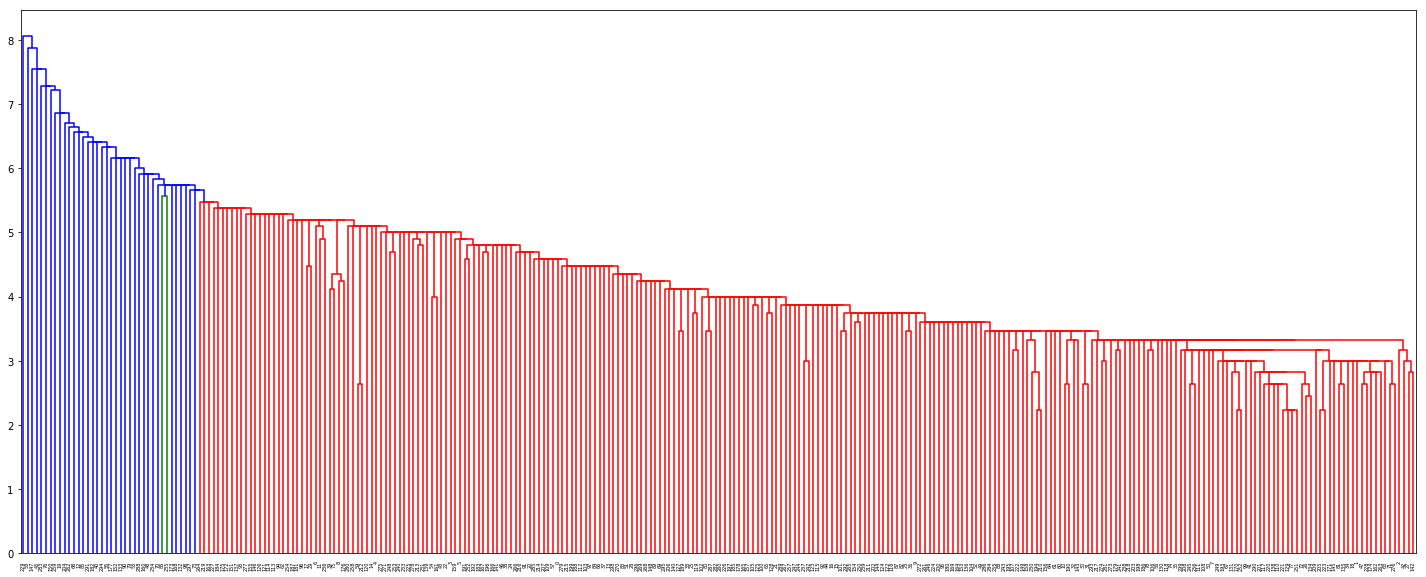

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

votos = votos.iloc[:300,:]

plt.figure(figsize=(25, 10))

dendrogram(linkage(votos, 'single'))

plt.show()

# Análisis supervisado
Hasta el momento no tuvimos en cuenta las etiquetas, pero podemos utilizar las etiquetas para tener una idea si los clusters encontrados se parecen a conjuntos conocidos.

**IMPLEMENTAR** Construya un conjunto de votos formado solo por los votos del Frente Amplio, el Partido Nacional y el Partido Colorado. Construya un array que represente las etiquetas para esos votos (usando las etiquetas 0, 1 y 2).

In [33]:
votos_tres = datos[datos['party'].isin(['Frente Amplio','Partido Nacional','Partido Colorado'])].iloc[:,2:28]
etiquetas_tres = datos[datos['party'].isin(['Frente Amplio','Partido Nacional','Partido Colorado'])]['party']

**IMPLEMENTAR:** Realice el clustering K-means con K=3 para el conjunto construido. Imprima los valores de SSE y coeficiente de silueta. Utilizando el conjunto de etiquetas esperadas, imprima los valores de Índice de Rand Ajustado, Homogeneidad, Completitud y medida V.

SSE:  1117916.42101


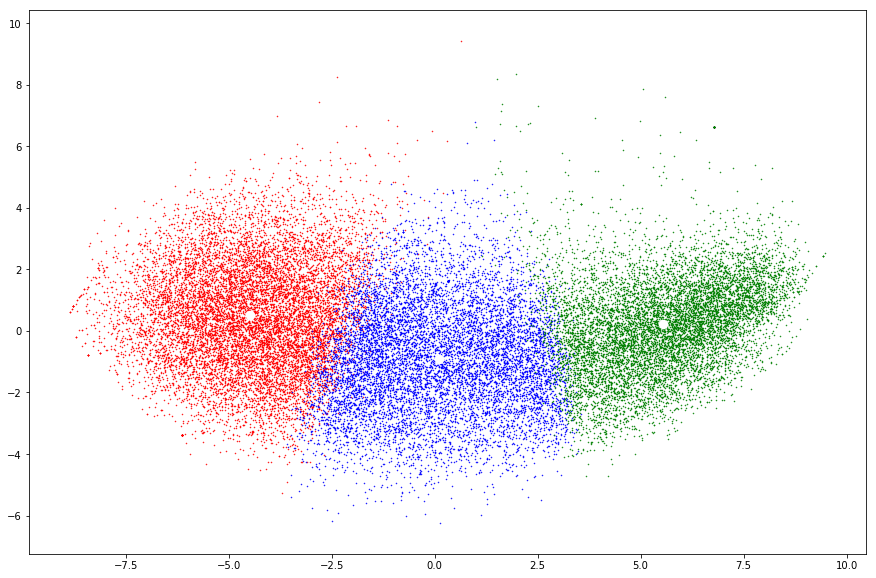

0.322189721889
0.316758486459
0.319451020677
0.308789038777


In [36]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
kmeans = KMeans(n_clusters=3).fit(votos_tres)
labels = kmeans.predict(votos_tres)

print('SSE: ', kmeans.inertia_)
# print('Silueta: ', silhouette_score(votos, labels))

plot_pca_data([(votos_tres[labels==0],'r'),(votos_tres[labels==1],'b'),(votos_tres[labels==2],'g')], kmeans.cluster_centers_)

print(homogeneity_score(etiquetas_tres, labels))
print(completeness_score(etiquetas_tres, labels))
print(v_measure_score(etiquetas_tres, labels))
print(adjusted_rand_score(etiquetas_tres, labels))

**IMPLEMENTAR:** Imprima la matriz de confusión de las etiquetas devueltas por el clustering y las etiquetas esperadas. ¿Qué problema puede tener esta matriz?


In [12]:
#implementar

¿Es posible distinguir alguno de los tres partidos respecto a los otros dos utilizando clustering?

**IMPLEMENTAR:** Construya tres conjuntos con etiquetas uno-contra-el-resto (FA/PN-PC, PN/FA-PC, PC/FA-PN), realice el clustering con K=2 para los votos e imprima los resultados de Índice Rand Ajustado, Homogeneidad, Completitud y medida V para los tres conjuntos de etiquetas.

In [13]:
#implementar

**OPCIONAL:** Realice AgglomerativeClustering usando el conjunto de tres partidos e imprima Índice Rand Ajustado, Homogeneidad, Completitud y medida V respecto a las etiquetas esperadas.

In [14]:
#implementar

# K-means para clasificar

**OPCIONAL:** Es posible utilizar K-means como para clasificar además de clusterizar. Realice una partición del conjunto de votos de tres partidos en 75% entrenamiento y 25% test. Realice clustering de K-means con K=3 y utilícelo para predecir el conjunto de test. Evalúe precisión, recall, medida F e imprima la matriz de confusión. ¿Cómo podría mejorar estos resultados?

In [ ]:
#opcional